# Part 1: London's underground resilience

## I. Topological net work
### I.1 Centrality measures

Select 3 centrality measures to characterise nodes, aiming at identifying the most important nodes in this particular network. In addition to giving their definitions, explain what do the measures mean into the context of the underground, and why they will allow you to find the stations that are most crucial for the functioning of the underground. Compute the measures for your nodes in the network, and give the results in a table for the first 10 ranked nodes for each of the 3 measures. (9 marks, 3 per measure)

* Degree centrality
* Closeness centrality
* Betweenness centrality

In [1]:
# import libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# read our data
G = nx.read_graphml('london.graph')

In [3]:
# to have a look at our network
print(nx.info(G))
# to check node attribute
list(G.nodes(data = True))[0]

Graph with 401 nodes and 467 edges


<ipython-input-3-9543ba7162cf>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [4]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])
    

In [5]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [6]:
# To check edges attributes:
list(G.edges(data = True))[0:3]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816, 'line_name': 'Jubilee', 'flows': 6744}),
 ('Wembley Park',
  'Preston Road',
  {'length': 1419.7351657633037, 'line_name': 'Metropolitan', 'flows': 36601})]

In [7]:
for e1, e2, flows in G.edges(data='flows'):
    if flows == 0:
        flows = 0.001
    v_weights={(e1, e2):round(1./flows,7)}
    nx.set_edge_attributes(G, v_weights, 'v_weights')

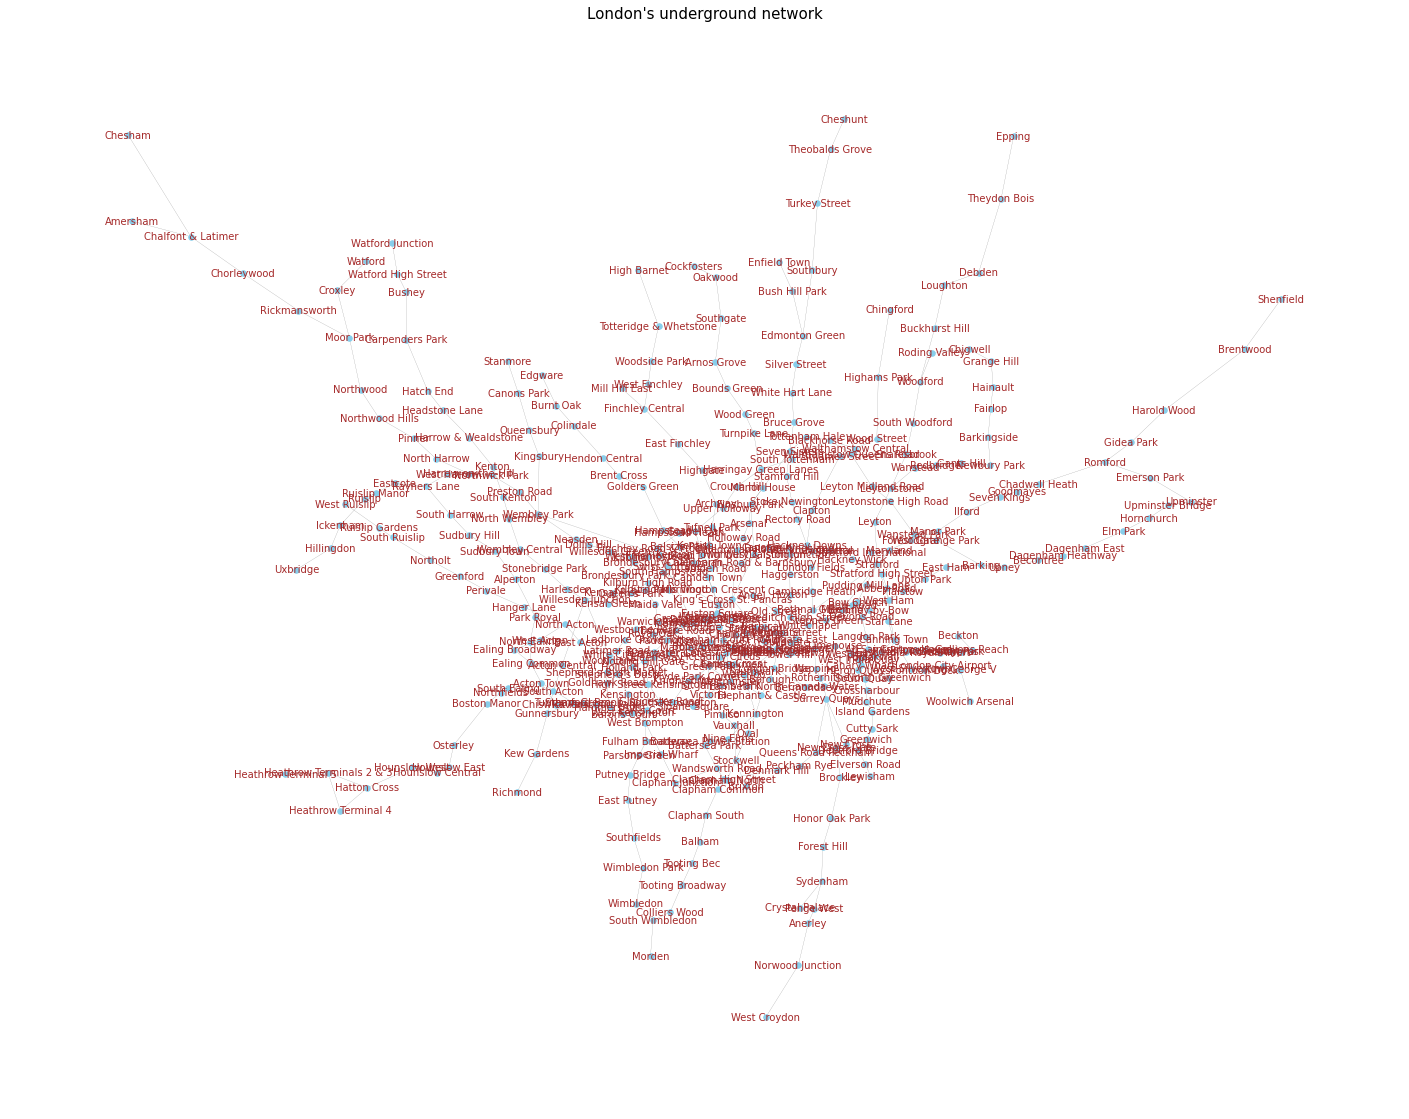

In [8]:
# plot the network

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))
pos = nx.get_node_attributes(G, 'coords')


nx.draw_networkx_nodes(G,pos,node_size=30,node_color='skyblue')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2,edge_color='grey')
nx.draw_networkx_labels(G,pos, font_size=10, font_color='brown')

plt.title("London's underground network",fontsize=15)
plt.axis("off")
plt.show()


In [9]:
# We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,length,flows,line_name,v_weights
0,Wembley Park,Kingsbury,2916.771558,12356,Jubilee,0.000081
1,Wembley Park,Neasden,2353.165938,6744,Jubilee,0.000148
2,Wembley Park,Preston Road,1419.735166,36601,Metropolitan,0.000027
3,Wembley Park,Finchley Road,7266.373927,55216,Metropolitan,0.000018
4,Kingsbury,Queensbury,1245.995234,9419,Jubilee,0.000106
5,Queensbury,Canons Park,1693.307343,6385,Jubilee,0.000157
6,Canons Park,Stanmore,1419.669476,3624,Jubilee,0.000276
7,Stratford,West Ham,1673.509515,91801,Jubilee,0.000011
8,Stratford,Mile End,2805.001392,12010,Central,0.000083
9,Stratford,Leyton,2131.342926,56082,Central,0.000018


In [10]:
df.sort_values(by='flows')

,source,target,length,flows,line_name,v_weights
398,Kennington,Nine Elms,2030.621843,0,Northern,1000.000000
426,Battersea Power Station,Nine Elms,1073.465362,0,Northern,1000.000000
224,Wandsworth Road,Battersea Park,1168.489261,0,London Overground,1000.000000
396,Elephant & Castle,Lambeth North,995.720282,94,Bakerloo,0.010638
153,Theobalds Grove,Cheshunt,1539.905628,287,London Overground,0.003484
...,...,...,...,...,...,...
14,Stratford,Liverpool Street,6698.461270,146148,TfL Rail,0.000007
103,Bank and Monument,Liverpool Street,841.502684,160401,Central,0.000006
43,Westminster,Green Park,1423.780195,189976,Jubilee,0.000005
42,Waterloo,Bank and Monument,2542.954444,216157,Waterloo & City,0.000005


#### 1.1.1 Degree centrality on nodes

In [11]:
# calculate the degree centrality using networkx function:
deg_c =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_c),'deg_c')

# To dataframe using the nodes as the index
df1 = pd.DataFrame(index=G.nodes())
df1['deg_c'] = pd.Series(nx.get_node_attributes(G, 'deg_c'))


# reset index and change the current index to column
df1 = df1.reset_index()
df1 = df1.rename(columns = {'index':'station_name'})


# sort degree values descending and get the first 10 ranked noedes
df_sorted1 = df1.sort_values(["deg_c"], ascending=False)
df_sorted1 = df_sorted1[0:10]

In [12]:
df_sorted1

,station_name,deg_c
5,Stratford,0.0225
50,Bank and Monument,0.0200
229,King's Cross St. Pancras,0.0175
18,Baker Street,0.0175
180,Earl's Court,0.0150
45,Oxford Circus,0.0150
51,Liverpool Street,0.0150
14,Waterloo,0.0150
16,Green Park,0.0150
7,Canning Town,0.0150


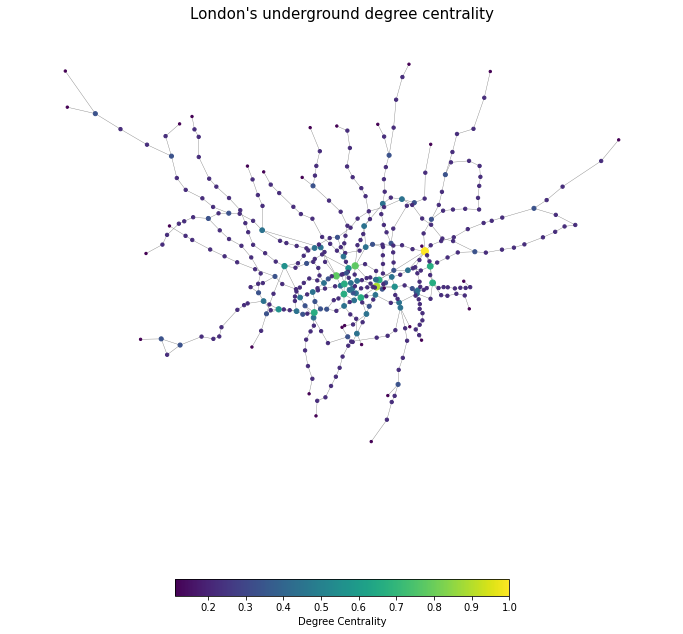

In [13]:
# set colour and size of nodes according to betweenness values
degree_values=[(i[1]['deg_c']) for i in G.nodes(data=True)]

deg_color=[(i[1]['deg_c']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['deg_c']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London's underground degree centrality",fontsize=15)
plt.show()

#### 1.1.2 Closeness centrality on nodes:

Let $d_{ij}$ be the geodesic distance (shortest path) between node $i$ and $j$. The mean geodesic distance of node $i$ to all other nodes is given by:

    
\begin{equation} l_{i}=\frac{1}{n} \sum_{j} d_{ij}\end{equation}
    
where $n$ is the total number of nodes.

A node that is very close to most nodes, and has hence low mean geodesic, will be more influential than a node which is far away. This gives rise to the following definition for the closeness centrality of node $i$:

\begin{equation} C_{i}= \frac{1}{l_{i}} = \frac{n}{\sum_{j} d_{ij}}\end{equation}

Let us compute the closeness centrality for each node in London's underground network.

In [14]:
# topological closeness centrality: 
clos_c=nx.closeness_centrality(G)
# add these values to the nodes attributes:
nx.set_node_attributes(G,clos_c,'closeness_c')

# To ataframe using the nodes as the index
df2 = pd.DataFrame(index=G.nodes())

df2['closeness_c'] = pd.Series(nx.get_node_attributes(G, 'closeness_c'))
df2 = df2.reset_index()
df2 = df2.rename(columns = {'index':'station_name'})


df_sorted2 = df2.sort_values(["closeness_c"], ascending=False)
df_sorted2 = df_sorted2[0:10]

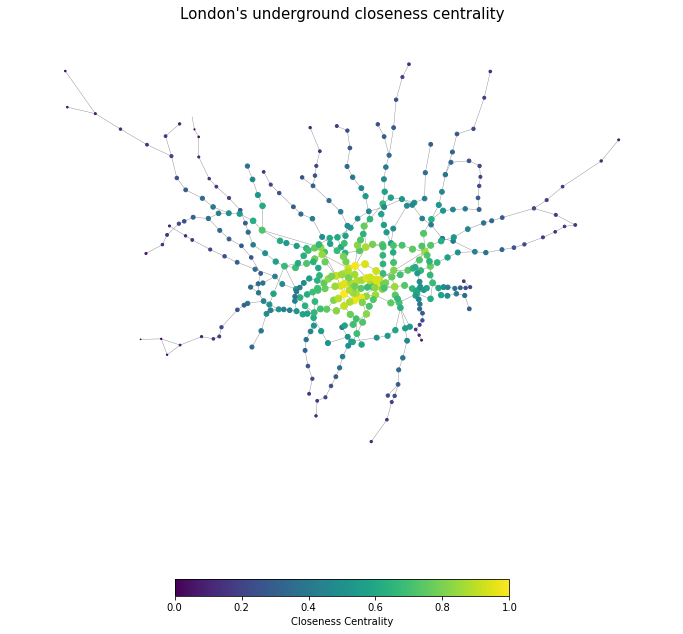

In [15]:
# set color and width of nodes according to the closeness values

clos_c_val=[(i[1]['closeness_c']) for i in G.nodes(data=True)]

closs_c_color=[(i[1]['closeness_c']-min(clos_c_val))/(max(clos_c_val)-min(clos_c_val)) for i in G.nodes(data=True)]
closs_c_size=[((i[1]['closeness_c']-min(clos_c_val))/(max(clos_c_val)-min(clos_c_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_c_color,
        node_size= closs_c_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London's underground closeness centrality",fontsize=15)
plt.show()

#### 1.1.3 Betweenness centrality on nodes:

In [16]:
# topological betweenness centrality:
# compute the betweenness centrality for the network, considering the distance between stations:

bet_c=nx.betweenness_centrality(G)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_c,'betweenness_c')

# To dataframe using the nodes as the index

df3 = pd.DataFrame(index=G.nodes())
df3['betweenness_c'] = pd.Series(nx.get_node_attributes(G, 'betweenness_c'))

df3 = df3.reset_index()
df3 = df3.rename(columns = {'index':'station_name'})


df_sorted3 = df3.sort_values(["betweenness_c"], ascending=False)
df_sorted3 = df_sorted3[0:10]

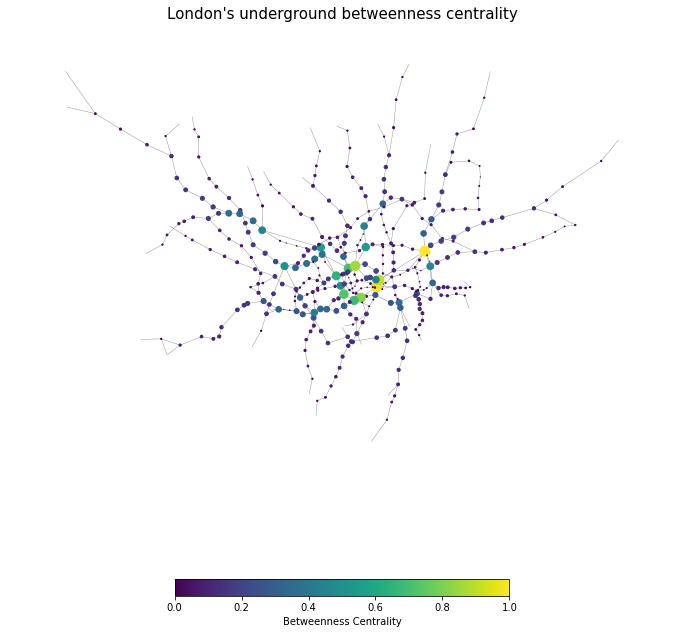

In [17]:
# set colour and size of nodes according to betweenness values
betweenness_c_values=[(i[1]['betweenness_c']) for i in G.nodes(data=True)]

bet_c_color=[(i[1]['betweenness_c']/max(betweenness_c_values)) for i in G.nodes(data=True)]
bet_c_size=[(i[1]['betweenness_c']/max(betweenness_c_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_c_color,
        node_size= bet_c_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London's underground betweenness centrality",fontsize=15)
plt.show()

### I.2 Impact measures

Find 2 different measures to evaluate the impact of the node removal on the network. These are global measures referring to the whole network and not to particular nodes or links. Explain whether these two measures to evaluate the impact are specific to the London underground, or whether they would also be useful to evaluate the resilience of any other network. (10 marks, 5 per measure)

### I.3 Node removal
For each of the centrality measures selected in 1.
**remove at least 10 nodes following two different strategies**.

A) non-sequential removal: using your table in 1.- remove 1 node at a time following the rank in the table, i.e. from the most important one to the 10 th most important one. 
After each removal, evaluate the impact of the removal using your **two measures in 2**. and proceed until you have removed at least **10 nodes**. 

B) sequential: remove the highest ranked node and evaluate the impact using the 2 measures. After removal, re-compute the centrality measure. Remove the highest ranked node in the new network and evaluate the impact. Continue until removing at least **10 nodes**. Report the results of the 2 strategies in one plot, and 

critically discuss the following: 
* which centrality measure reflects better the importance of a station for the functioning of the underground 
* which strategy is more effective at studying resilience
* which impact measure is better at assessing the damage after node removal.

-------------------------------------------------------------------------------------------------------------------------------

#### A) Non-sequential removal

In [18]:
dc_sorted_ten = df_sorted1['station_name'].tolist()
dc_sorted_ten

['Stratford',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Baker Street',
 "Earl's Court",
 'Oxford Circus',
 'Liverpool Street',
 'Waterloo',
 'Green Park',
 'Canning Town']

In [19]:
cc_sorted_ten = df_sorted2['station_name'].tolist()
cc_sorted_ten

['Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Westminster',
 'Waterloo',
 'Oxford Circus',
 'Bond Street',
 'Farringdon',
 'Angel',
 'Moorgate']

In [20]:
bc_sorted_ten = df_sorted3['station_name'].tolist()
bc_sorted_ten

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [21]:
# build functions to calculate the number of nodes in the largest component over the number of nodes in who graph

# 1. number of nodes in the largest component
def lc_nodes(G): 
    y = max(nx.connected_components(G), key=len)
    x = G.subgraph(y)
    z = x.number_of_nodes()
    p = z/G.number_of_nodes()
    return p

In [22]:
G1=G.copy()
G2=G.copy()
G3=G.copy()

In [23]:
# create empty lists
list_global_efficiency = []
list_lc_nodes = []

In [24]:
# create a function to remove nodes and measure the impact (non-sequential)
def remove(st_ls,graph):
    for s in st_ls:
        graph.remove_node(s)
        print("remove: ",s)
        print("the global efficiency is: ", nx.global_efficiency(graph))
        print("largest connected component size: ",lc_nodes(graph))
        
        # print("the density of network is: ",nx.density(graph))
        print("the number of connected component is: ",nx.number_connected_components(graph))
        list_global_efficiency.append(nx.global_efficiency(graph))
        list_lc_nodes.append(lc_nodes(graph))
        print("the network now has noedes: ", len(list(graph.nodes)))
        print("\n")
    print("done")

In [25]:
# the global efficiency and number of nodes and edges of the network before removal
ori_ge = nx.global_efficiency(G)
ori_lccs = G.number_of_nodes()/G.number_of_nodes()
print(ori_ge,"\n",ori_lccs,"\n")

0.1012561935972123 
 1.0 



##### 1.3.1.1 degree centrality remove

In [26]:
remove(dc_sorted_ten,G1)

remove:  Stratford
the global efficiency is:  0.08891736066510689
largest connected component size:  0.9475
the number of connected component is:  3
the network now has noedes:  400


remove:  Bank and Monument
the global efficiency is:  0.08586164448742485
largest connected component size:  0.9473684210526315
the number of connected component is:  3
the network now has noedes:  399


remove:  King's Cross St. Pancras
the global efficiency is:  0.08028700838265396
largest connected component size:  0.9472361809045227
the number of connected component is:  3
the network now has noedes:  398


remove:  Baker Street
the global efficiency is:  0.07570039409751211
largest connected component size:  0.9420654911838791
the number of connected component is:  4
the network now has noedes:  397


remove:  Earl's Court
the global efficiency is:  0.0740361229198828
largest connected component size:  0.9419191919191919
the number of connected component is:  4
the network now has noedes:  396


remo

In [27]:
dc_ge = list_global_efficiency
dc_ge

[0.08891736066510689,
 0.08586164448742485,
 0.08028700838265396,
 0.07570039409751211,
 0.0740361229198828,
 0.07274535237569829,
 0.07094844226118287,
 0.06898194318071488,
 0.06825731584971681,
 0.06338447666647608]

In [28]:
dc_lc_nodes = list_lc_nodes
dc_lc_nodes

[0.9475,
 0.9473684210526315,
 0.9472361809045227,
 0.9420654911838791,
 0.9419191919191919,
 0.9392405063291139,
 0.9263959390862944,
 0.926208651399491,
 0.9260204081632653,
 0.8925831202046036]

##### 1.3.1.2 closeness centrality remove

In [29]:
# create empty lists
list_global_efficiency = []
list_lc_nodes = []

In [30]:
remove(cc_sorted_ten,G2)

remove:  Green Park
the global efficiency is:  0.09918991960788402
largest connected component size:  1.0
the number of connected component is:  1
the network now has noedes:  400


remove:  Bank and Monument
the global efficiency is:  0.09487232544791133
largest connected component size:  1.0
the number of connected component is:  1
the network now has noedes:  399


remove:  King's Cross St. Pancras
the global efficiency is:  0.08793385149140875
largest connected component size:  1.0
the number of connected component is:  1
the network now has noedes:  398


remove:  Westminster
the global efficiency is:  0.08737164566976727
largest connected component size:  1.0
the number of connected component is:  1
the network now has noedes:  397


remove:  Waterloo
the global efficiency is:  0.08485943799789313
largest connected component size:  1.0
the number of connected component is:  1
the network now has noedes:  396


remove:  Oxford Circus
the global efficiency is:  0.08278135073141742


In [31]:
cc_ge = list_global_efficiency
cc_lc_nodes = list_lc_nodes

In [32]:
cc_ge

[0.09918991960788402,
 0.09487232544791133,
 0.08793385149140875,
 0.08737164566976727,
 0.08485943799789313,
 0.08278135073141742,
 0.08258086417012774,
 0.08260040537396239,
 0.08262233108950982,
 0.08166991436767818]

In [33]:
cc_lc_nodes

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9948849104859335]

##### 1.3.1.3 betweenness centrality remove

In [34]:
# create empty lists
list_global_efficiency = []
list_lc_nodes = []

In [35]:
remove(bc_sorted_ten,G3)

remove:  Stratford
the global efficiency is:  0.08891736066510689
largest connected component size:  0.9475
the number of connected component is:  3
the network now has noedes:  400


remove:  Bank and Monument
the global efficiency is:  0.08586164448742485
largest connected component size:  0.9473684210526315
the number of connected component is:  3
the network now has noedes:  399


remove:  Liverpool Street
the global efficiency is:  0.08496349266423939
largest connected component size:  0.9472361809045227
the number of connected component is:  3
the network now has noedes:  398


remove:  King's Cross St. Pancras
the global efficiency is:  0.07849775440713821
largest connected component size:  0.9345088161209067
the number of connected component is:  4
the network now has noedes:  397


remove:  Waterloo
the global efficiency is:  0.07594226578366223
largest connected component size:  0.9343434343434344
the number of connected component is:  4
the network now has noedes:  396


rem

In [36]:
bc_ge = list_global_efficiency
bc_lc_nodes = list_lc_nodes

In [37]:
bc_ge

[0.08891736066510689,
 0.08586164448742485,
 0.08496349266423939,
 0.07849775440713821,
 0.07594226578366223,
 0.07415154167648695,
 0.06820564659789057,
 0.06765950327361094,
 0.064700058053009,
 0.06313903700825897]

In [38]:
bc_lc_nodes

[0.9475,
 0.9473684210526315,
 0.9472361809045227,
 0.9345088161209067,
 0.9343434343434344,
 0.9341772151898734,
 0.8781725888324873,
 0.8778625954198473,
 0.8724489795918368,
 0.8670076726342711]

#### B）Sequential

In [39]:
list_global_efficiency = []
list_lc_nodes = []

In [40]:
# the function to recalculate the centrality and keep removing the top1 node

def decentop(G,centrality):
    # calculate the degree centrality using networkx function:
    dc = centrality(G)
    nx.set_node_attributes(G,dict(dc),'dc')

    # To dataframe using the nodes as the index
    df = pd.DataFrame(index=G.nodes())
    df['dc'] = pd.Series(nx.get_node_attributes(G, 'dc'))


    # reset index and change the current index to column
    df = df.reset_index()
    df = df.rename(columns = {'index':'station_name'})


    # sort degree values descending and get the first 10 ranked noedes
    df_sorted = df.sort_values(["dc"], ascending=False)
    top = df_sorted.iloc[0]['station_name']
    G.remove_node(top)
    print("remove the top 1 node: ", top)
    print("the graph has nodes: ",len(list(G.nodes)))
    print("the global efficiency of the graph is: ", nx.global_efficiency(G))
    print("the fraction of nodes in the lcc is: ", lc_nodes(G))
    
    print("the number of connected components is: ",nx.number_connected_components(G))
    list_global_efficiency.append(nx.global_efficiency(G))
    list_lc_nodes.append(lc_nodes(G))
    print("\n")

In [41]:
# the function to repeat the process until removing 10 nodes
def seqremove(G,centrality):
    num = 10
    for i in range(num):
        decentop(G,centrality)

##### 1.3.2.1 degree centrality remove (sequential)

In [42]:
list_global_efficiency = []
list_lc_nodes = []

In [43]:
# degree centrality
Gs1 = G.copy()
seqremove(Gs1,nx.degree_centrality)

remove the top 1 node:  Stratford
the graph has nodes:  400
the global efficiency of the graph is:  0.08891736066510689
the fraction of nodes in the lcc is:  0.9475
the number of connected components is:  3


remove the top 1 node:  Bank and Monument
the graph has nodes:  399
the global efficiency of the graph is:  0.08586164448742485
the fraction of nodes in the lcc is:  0.9473684210526315
the number of connected components is:  3


remove the top 1 node:  Baker Street
the graph has nodes:  398
the global efficiency of the graph is:  0.08203328759057034
the fraction of nodes in the lcc is:  0.9472361809045227
the number of connected components is:  3


remove the top 1 node:  King's Cross St. Pancras
the graph has nodes:  397
the global efficiency of the graph is:  0.07570039409751211
the fraction of nodes in the lcc is:  0.9420654911838791
the number of connected components is:  4


remove the top 1 node:  Earl's Court
the graph has nodes:  396
the global efficiency of the graph is: 

In [44]:
dc_ge_seq = list_global_efficiency
dc_nodes_seq = list_lc_nodes

In [45]:
dc_ge_seq

[0.08891736066510689,
 0.08586164448742485,
 0.08203328759057034,
 0.07570039409751211,
 0.0740361229198828,
 0.07300367580539921,
 0.0677717604548151,
 0.06012752519564628,
 0.05814535563710196,
 0.05685866730429425]

In [46]:
dc_nodes_seq

[0.9475,
 0.9473684210526315,
 0.9472361809045227,
 0.9420654911838791,
 0.9419191919191919,
 0.9417721518987342,
 0.9086294416243654,
 0.8753180661577609,
 0.8622448979591837,
 0.8593350383631714]

##### 1.3.2.2 closeness centrality remove (sequential)

In [47]:
list_global_efficiency = []
list_lc_nodes = []

In [48]:
# closeness centrality
Gs2 = G.copy()
seqremove(Gs2,nx.closeness_centrality)

remove the top 1 node:  Green Park
the graph has nodes:  400
the global efficiency of the graph is:  0.09918991960788402
the fraction of nodes in the lcc is:  1.0
the number of connected components is:  1


remove the top 1 node:  King's Cross St. Pancras
the graph has nodes:  399
the global efficiency of the graph is:  0.09443475025566316
the fraction of nodes in the lcc is:  1.0
the number of connected components is:  1


remove the top 1 node:  Waterloo
the graph has nodes:  398
the global efficiency of the graph is:  0.09181648060183005
the fraction of nodes in the lcc is:  1.0
the number of connected components is:  1


remove the top 1 node:  Bank and Monument
the graph has nodes:  397
the global efficiency of the graph is:  0.08542563066911478
the fraction of nodes in the lcc is:  1.0
the number of connected components is:  1


remove the top 1 node:  West Hampstead
the graph has nodes:  396
the global efficiency of the graph is:  0.08054424756502003
the fraction of nodes in the

In [49]:
cc_ge_seq = list_global_efficiency
cc_nodes_seq = list_lc_nodes

In [50]:
cc_ge_seq

[0.09918991960788402,
 0.09443475025566316,
 0.09181648060183005,
 0.08542563066911478,
 0.08054424756502003,
 0.05810104159173278,
 0.051883620553389555,
 0.05035000093626794,
 0.04439458727102797,
 0.04295771061337044]

In [51]:
cc_nodes_seq

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5721518987341773,
 0.5736040609137056,
 0.5725190839694656,
 0.49744897959183676,
 0.4961636828644501]

##### 1.3.2.3 betweenness centrality remove (sequential)

In [52]:
list_global_efficiency = []
list_lc_nodes = []

In [53]:
# betweenness centrality
Gs3 = G.copy()
seqremove(Gs3,nx.betweenness_centrality)

remove the top 1 node:  Stratford
the graph has nodes:  400
the global efficiency of the graph is:  0.08891736066510689
the fraction of nodes in the lcc is:  0.9475
the number of connected components is:  3


remove the top 1 node:  King's Cross St. Pancras
the graph has nodes:  399
the global efficiency of the graph is:  0.08460293133575152
the fraction of nodes in the lcc is:  0.9473684210526315
the number of connected components is:  3


remove the top 1 node:  Waterloo
the graph has nodes:  398
the global efficiency of the graph is:  0.08182895253292936
the fraction of nodes in the lcc is:  0.9472361809045227
the number of connected components is:  3


remove the top 1 node:  Bank and Monument
the graph has nodes:  397
the global efficiency of the graph is:  0.07767794342812263
the fraction of nodes in the lcc is:  0.947103274559194
the number of connected components is:  3


remove the top 1 node:  Canada Water
the graph has nodes:  396
the global efficiency of the graph is:  0.07

In [54]:
bc_ge_seq = list_global_efficiency
bc_nodes_seq = list_lc_nodes

In [55]:
bc_ge_seq

[0.08891736066510689,
 0.08460293133575152,
 0.08182895253292936,
 0.07767794342812263,
 0.07283234083472483,
 0.053210203984026455,
 0.05165629952389727,
 0.0458442134055722,
 0.04163076968121037,
 0.0381637040943985]

In [56]:
bc_nodes_seq

[0.9475,
 0.9473684210526315,
 0.9472361809045227,
 0.947103274559194,
 0.946969696969697,
 0.5746835443037974,
 0.5736040609137056,
 0.49872773536895676,
 0.4413265306122449,
 0.43478260869565216]

#### 1.3.3 Plot the results

why I think betweenness centrality is the best way.

In [57]:
# insert original assessment to lists
# build a function to insert original assessment to lists
lis1 = [dc_ge,cc_ge,bc_ge]
lis2 = [dc_lc_nodes,cc_lc_nodes,bc_lc_nodes]
def ori_insert(ls,res):
    ls.insert(0,res)
    return ls

In [58]:
# add original data (global efficiency, largest connected component size)
for i in lis1:
    ori_insert(i,ori_ge)

for i in lis2:
    ori_insert(i,ori_lccs)


In [59]:
lis0 = range(11)

In [60]:
# create data frame for global efficiency
df_ge = pd.DataFrame(
{
    'removal':lis0,
    'dc_ge':dc_ge,
    'cc_ge':cc_ge,
    'bc_ge':bc_ge
})


In [61]:
# prepare for the plotting
df_ge

,removal,dc_ge,cc_ge,bc_ge
0,0,0.101256,0.101256,0.101256
1,1,0.088917,0.099190,0.088917
2,2,0.085862,0.094872,0.085862
3,3,0.080287,0.087934,0.084963
4,4,0.075700,0.087372,0.078498
5,5,0.074036,0.084859,0.075942
6,6,0.072745,0.082781,0.074152
7,7,0.070948,0.082581,0.068206
8,8,0.068982,0.082600,0.067660
9,9,0.068257,0.082622,0.064700


In [62]:
# create dataframe for comparing the nodes in the largest components
df_nodes = pd.DataFrame(
{
    'removal':lis0,
    'dc_nodes':dc_lc_nodes,
    'cc_nodes':cc_lc_nodes,
    'bc_nodes':bc_lc_nodes
})
df_nodes

,removal,dc_nodes,cc_nodes,bc_nodes
0,0,1.000000,1.000000,1.000000
1,1,0.947500,1.000000,0.947500
2,2,0.947368,1.000000,0.947368
3,3,0.947236,1.000000,0.947236
4,4,0.942065,1.000000,0.934509
5,5,0.941919,1.000000,0.934343
6,6,0.939241,1.000000,0.934177
7,7,0.926396,1.000000,0.878173
8,8,0.926209,1.000000,0.877863
9,9,0.926020,1.000000,0.872449


In [63]:
# insert original assessment to lists
# build a function to insert original assessment to lists
lis3 = [dc_ge_seq,cc_ge_seq,bc_ge_seq]
lis4 = [dc_nodes_seq,cc_nodes_seq,bc_nodes_seq]

# add original data (global efficiency, nodes and edges in the largest component)
for i in lis3:
    ori_insert(i,ori_ge)

for i in lis4:
    ori_insert(i,ori_lccs)

In [64]:
# create data frame for global efficiency
df_ge_seq = pd.DataFrame(
{
    'removal':lis0,
    'dc_ge_seq':dc_ge_seq,
    'cc_ge_seq':cc_ge_seq,
    'bc_ge_seq':bc_ge_seq
})
df_ge_seq
# create dataframe for comparing the nodes in the largest components
df_nodes_seq = pd.DataFrame(
{
    'removal':lis0,
    'dc_nodes_seq':dc_nodes_seq,
    'cc_nodes_seq':cc_nodes_seq,
    'bc_nodes_seq':bc_nodes_seq
})
df_nodes_seq


,removal,dc_nodes_seq,cc_nodes_seq,bc_nodes_seq
0,0,1.000000,1.000000,1.000000
1,1,0.947500,1.000000,0.947500
2,2,0.947368,1.000000,0.947368
3,3,0.947236,1.000000,0.947236
4,4,0.942065,1.000000,0.947103
5,5,0.941919,1.000000,0.946970
6,6,0.941772,0.572152,0.574684
7,7,0.908629,0.573604,0.573604
8,8,0.875318,0.572519,0.498728
9,9,0.862245,0.497449,0.441327


##### Golbal efficiency

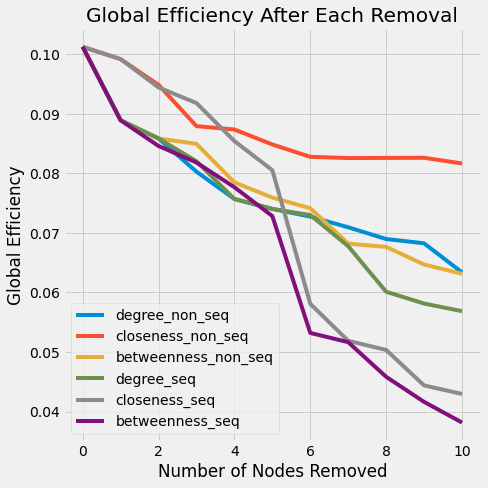

In [68]:
# plot for sequential and non-sequential removal
# compare the global efficiency changes in 3 different situations
plt.style.use('fivethirtyeight')

removal = df_ge['removal']
dc_ge = df_ge['dc_ge']
cc_ge = df_ge['cc_ge']
bc_ge = df_ge['bc_ge']
dc_ge_seq = df_ge_seq['dc_ge_seq']
cc_ge_seq = df_ge_seq['cc_ge_seq']
bc_ge_seq = df_ge_seq['bc_ge_seq']

fig, ax1 = plt.subplots(nrows = 1, ncols = 1,figsize = (7,7))

ax1.plot(removal, dc_ge,label = 'degree_non_seq')
ax1.plot(removal, cc_ge, label='closeness_non_seq')
ax1.plot(removal, bc_ge, label='betweenness_non_seq')
ax1.plot(removal, dc_ge_seq,label = 'degree_seq')
ax1.plot(removal, cc_ge_seq, label='closeness_seq')
ax1.plot(removal, bc_ge_seq, label='betweenness_seq')
ax1.legend()
ax1.set_title('Global Efficiency After Each Removal')
ax1.set_xlabel('Number of Nodes Removed')
ax1.set_ylabel('Global Efficiency')

# ax2.plot(removal, dc_nodes,label = 'degree')
# ax2.plot(removal, cc_nodes, label='closeness')
# ax2.plot(removal, bc_nodes, label='betweenness')

plt.tight_layout()
plt.show()

fig.savefig('ge_six.png')

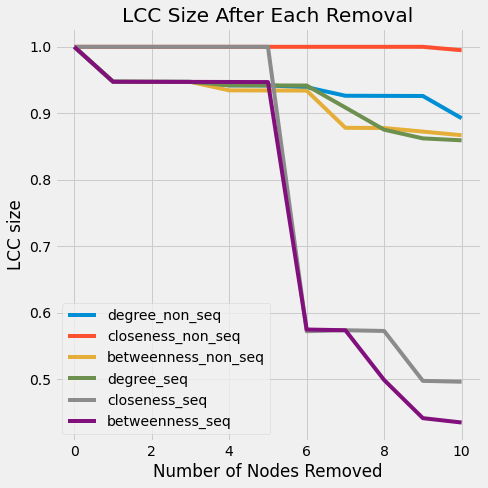

In [73]:
# compare the largest connected component size changes in 3 different situations
plt.style.use('fivethirtyeight')

removal = df_nodes['removal']
dc_nodes = df_nodes['dc_nodes']
cc_nodes = df_nodes['cc_nodes']
bc_nodes = df_nodes['bc_nodes']
dc_nodes_seq = df_nodes_seq['dc_nodes_seq']
cc_nodes_seq = df_nodes_seq['cc_nodes_seq']
bc_nodes_seq = df_nodes_seq['bc_nodes_seq']

fig, ax1= plt.subplots(nrows = 1, ncols = 1, figsize = (7,7))


ax1.plot(removal, dc_nodes,label = 'degree_non_seq')
ax1.plot(removal, cc_nodes, label='closeness_non_seq')
ax1.plot(removal, bc_nodes, label='betweenness_non_seq')
ax1.plot(removal, dc_nodes_seq,label ='degree_seq')
ax1.plot(removal, cc_nodes_seq, label='closeness_seq')
ax1.plot(removal, bc_nodes_seq, label='betweenness_seq')
ax1.legend()

ax1.set_title('LCC Size After Each Removal') # LCC: largest connected component
ax1.set_xlabel('Number of Nodes Removed')
ax1.set_ylabel('LCC size')

plt.tight_layout()
plt.show()

fig.savefig('lcc_zise_six.png')

#### 1.3.3.3 Plot for answering: which impact measure is better at assessing the damage after node removal.

**global efficience vs lagest component**

As I have chosen the betweenness centrality as my "best measure" to assess the importance of a station. So here I will compare the non-sequential and sequential method to find which impact measure is better.

In [75]:
comp_ge = pd.DataFrame(
    {
    'removal':lis0,
    'bc_ge_seq':bc_ge_seq,
    'bc_ge':bc_ge
    })

comp_lcc_nodes = pd.DataFrame(
    {'removal': lis0,
     'bc_lc_nodes':bc_lc_nodes,
     'bc_nodes_seq':bc_nodes_seq
    })

In [76]:
comp_ge

,removal,bc_ge_seq,bc_ge
0,0,0.101256,0.101256
1,1,0.088917,0.088917
2,2,0.084603,0.085862
3,3,0.081829,0.084963
4,4,0.077678,0.078498
5,5,0.072832,0.075942
6,6,0.053210,0.074152
7,7,0.051656,0.068206
8,8,0.045844,0.067660
9,9,0.041631,0.064700


In [77]:
comp_lcc_nodes

,removal,bc_lc_nodes,bc_nodes_seq
0,0,1.000000,1.000000
1,1,0.947500,0.947500
2,2,0.947368,0.947368
3,3,0.947236,0.947236
4,4,0.934509,0.947103
5,5,0.934343,0.946970
6,6,0.934177,0.574684
7,7,0.878173,0.573604
8,8,0.877863,0.498728
9,9,0.872449,0.441327


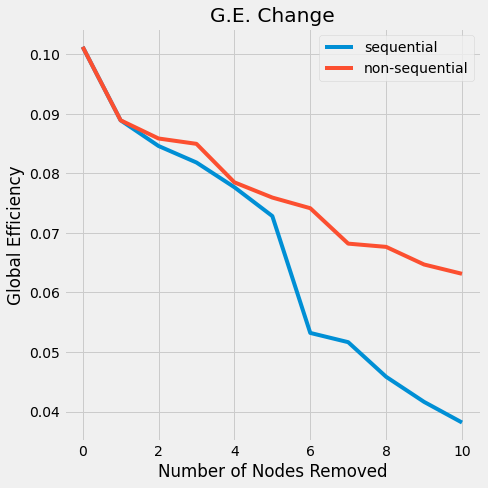

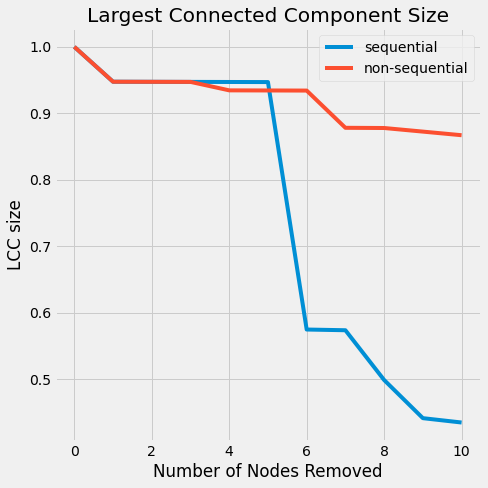

In [121]:
# non-sequential vs sequential
fig1, ax1= plt.subplots(nrows = 1, ncols = 1, figsize = (7,7))

ax1.plot(removal, bc_ge_seq,label = 'sequential')
ax1.plot(removal, bc_ge, label='non-sequential')

ax1.legend()
ax1.set_title('G.E. Change')
ax1.set_xlabel('Number of Nodes Removed')
ax1.set_ylabel('Global Efficiency')

plt.tight_layout()
plt.show()
fig1.savefig("ge_seq_vs_non.png")

fig2, ax2= plt.subplots(nrows = 1, ncols = 1, figsize = (7,7))
ax2.plot(removal, bc_nodes_seq, label='sequential')
ax2.plot(removal, bc_lc_nodes,label = 'non-sequential')

ax2.legend()
ax2.set_title('Largest Connected Component Size')
ax2.set_xlabel('Number of Nodes Removed')
ax2.set_ylabel('LCC size')


plt.tight_layout()
plt.show()

fig2.savefig('lcc_seq_vs_non.png')

### II. Flows: weighted networks
In this section, you will include passengers into the underground, and assess whether different measures need to be used when flows are considered. The network to use in this section is the weighted network given to you in the coursework, where the flows of passengers were assigned to the links between stations.

#### 2.1. Choose weighted betweenness centrality

Consider the centrality measure derived in I.- indicating the most relevant stations for assessing the vulnerability of the underground. 
What would you need to do to adjust this measure for a weighted network? 
Recompute the ranking of the 10 most important nodes according to this adjusted measure. Do you find the same ones as in I.1?

In [83]:
df.head()

,source,target,length,flows,line_name,v_weights
0,Wembley Park,Kingsbury,2916.771558,12356,Jubilee,0.000081
1,Wembley Park,Neasden,2353.165938,6744,Jubilee,0.000148
2,Wembley Park,Preston Road,1419.735166,36601,Metropolitan,0.000027
3,Wembley Park,Finchley Road,7266.373927,55216,Metropolitan,0.000018
4,Kingsbury,Queensbury,1245.995234,9419,Jubilee,0.000106


In [84]:
G21 = G.copy()

In [85]:
# weighted betweenness centrality:
# compute the betweenness centrality for the network, considering the flows between stations:

bet_w=nx.betweenness_centrality(G21,weight='v_weights',normalized=False) # weight = length or flows?

# add these values to the nodes attributes:
nx.set_node_attributes(G21,bet_w,'betweenness_w')

# To dataframe using the nodes as the index

df_bw = pd.DataFrame(index=G21.nodes())
df_bw['betweenness_w'] = pd.Series(nx.get_node_attributes(G21, 'betweenness_w'))

df_bw = df_bw.reset_index()
df_bw = df_bw.rename(columns = {'index':'station_name'})


In [86]:
df_bw_sorted = df_bw.sort_values(by = 'betweenness_w',ascending = False)[0:10]

In [87]:
df_bw_sorted

,station_name,betweenness_w
16,Green Park,45690.0
50,Bank and Monument,40322.0
14,Waterloo,33231.0
15,Westminster,30433.0
51,Liverpool Street,26878.0
5,Stratford,26437.0
17,Bond Street,23288.0
150,Euston,22682.0
45,Oxford Circus,21607.0
341,Warren Street,20292.0


In [88]:
df_sorted3

,station_name,betweenness_c
5,Stratford,0.297846
50,Bank and Monument,0.290489
51,Liverpool Street,0.270807
229,King's Cross St. Pancras,0.255307
14,Waterloo,0.243921
16,Green Park,0.215835
150,Euston,0.208324
15,Westminster,0.203335
18,Baker Street,0.191568
21,Finchley Road,0.165085


**Answer**
I find the same ones as in I.1.

#### II.2

Now consider **the measure** for assessing the impact of node removal. 

Would you adjust the measure for a weighted network? If yes, how? 

**Propose a different measure** that would be better at assessing the impact of closing a station taking into consideration the passengers.

In [103]:
df = pd.DataFrame(df.groupby(["target"])["flows"].agg(np.sum))

<IPython.core.display.Javascript object>

In [114]:
# original total inflow
ori_inflow = sum(df.flows)
ori_inflow

9930847

#### II.3. 

Remove only the highest ranked node according to the best performing centrality measure found in I.1.

Evaluate the impact according to the 2 measures in II.2. 

Repeat the experiment for the highest ranked node using the adjusted measure. If it’s the same node apply it to the second ranked node. 

Critically discuss which closure will have the largest impact on passengers, referring to your measures and results.

### 2.3.1 Remove the top 1 node (topological and weighted)

In [89]:
# have a look at the nodes with highest topological betweenness centrality and I am going to remove the top1 node
bc_sorted_ten

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [90]:
# copy the data
G4 = G.copy()
G5 = G.copy()

In [91]:
# remove the top1 node which is Stratford
G4.remove_node('Stratford')
# check 
len(list(G4.nodes))

400

In [92]:
# now the graph has components:
nx.number_connected_components(G4)
# check the largest components:
lar_nodes = lc_nodes(G4)
print(lar_nodes)

0.9475


In [93]:
# number of connected components
nx.number_connected_components(G4)

3

In [94]:
# for the weighted network
df_bw_sorted

,station_name,betweenness_w
16,Green Park,45690.0
50,Bank and Monument,40322.0
14,Waterloo,33231.0
15,Westminster,30433.0
51,Liverpool Street,26878.0
5,Stratford,26437.0
17,Bond Street,23288.0
150,Euston,22682.0
45,Oxford Circus,21607.0
341,Warren Street,20292.0


In [95]:
# so we need to remove the top1 node which is Green Park
G5.remove_node('Green Park')

# after removal we have nodes:
print(len(list(G5.nodes)))

# now the graph has components:
nx.number_connected_components(G5)

# check the largest components:
lar_nodes_w = lc_nodes(G5)
print(lar_nodes_w)

400
1.0


In [96]:
# number of connected components
nx.number_connected_components(G5)

1

In [115]:
def inflow(G):
    inflow = nx.to_pandas_edgelist(G)
    flow1 = pd.DataFrame(inflow.groupby(["target"])["flows"].agg(np.sum))
    inflow = sum(flow1.flows)
    a = inflow/ori_inflow
    return a

In [116]:
inflow(G4)

<IPython.core.display.Javascript object>

0.9632900396109214

In [117]:
inflow(G5)

<IPython.core.display.Javascript object>

0.9366980480114133

In [118]:
lc_nodes(G4)

0.9475

In [119]:
lc_nodes(G5)

1.0

---------------------------------------------------------------------------------------------------------------------


**Which closure will have the largest impact on passengers?**

According to the results above, We can see that after removing the Stratford, the graph splited into 3 disconnected parts. However, when we take flows into consideration, after removing the top1 node we still have a connected network. Thus, in my opinion, removing Stratford will have the largest impact on passengers.